In [ ]:
#RESNET 50

In [ ]:
import tensorflow as tf
print("GPU:", tf.config.list_physical_devices('GPU'))


GPU: []


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
train_path = '/content/drive/MyDrive/dataset/Covid19_chestXray/Train'
val_path = '/content/drive/MyDrive/dataset/Covid19_chestXray/Val'

# --- Settings ---
img_size = 224
batch_size = 32

# --- Data Generators ---
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary'
)



Found 296 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze the base model initially

model_1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output layer
])

model_1.compile(optimizer=Adam(learning_rate=1e-4),
                loss='binary_crossentropy',  # Correct loss for binary
                metrics=['accuracy'])

model_1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, verbose=1)


In [ ]:
history = model_1.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]  # Optional but recommended
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 8s/step - accuracy: 0.5233 - loss: 0.9487 - val_accuracy: 0.6833 - val_loss: 0.5166 - learning_rate: 1.0000e-04
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.7043 - loss: 0.5990 - val_accuracy: 0.8833 - val_loss: 0.3114 - learning_rate: 1.0000e-04
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.7746 - loss: 0.5170 - val_accuracy: 0.9333 - val_loss: 0.2317 - learning_rate: 1.0000e-04
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 82s 8s/step - accuracy: 0.8312 - loss: 0.3501 - val_accuracy: 0.9500 - val_loss: 0.1688 - learning_rate: 1.0000e-04
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 76s 8s/step - accuracy: 0.8792 - loss: 0.2906 - val_accuracy: 0.9500 - val_loss: 0.1361 - learning_rate: 1.0000e-04


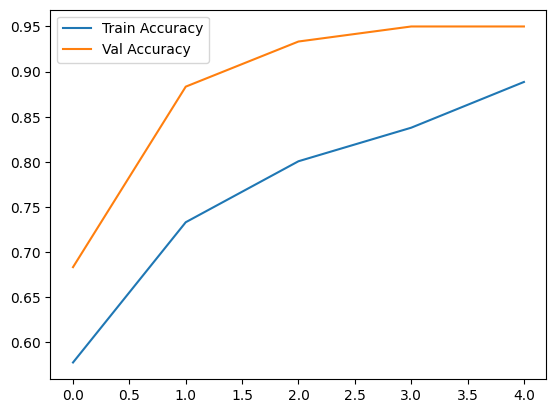

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model_1.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9563 - loss: 0.1344
Validation Accuracy: 95.00%


In [ ]:
#densenet121

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Paths
train_dir = '/content/drive/MyDrive/dataset/Covid19_chestXray/Train'
val_dir = '/content/drive/MyDrive/dataset/Covid19_chestXray/Val'

# Image dimensions
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation (for training)
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data (no augmentation)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # correct for 2 classes and sigmoid output
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 296 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model_densenet.trainable = False

model_densenet = Sequential([
    base_model_densenet,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model_densenet.compile(optimizer=Adam(learning_rate=1e-4),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

model_densenet.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
model_densenet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train
history = model_densenet.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5442 - loss: 0.9823

10/10 ━━━━━━━━━━━━━━━━━━━━ 96s 8s/step - accuracy: 0.5451 - loss: 0.9778 - val_accuracy: 0.6000 - val_loss: 0.6690
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5377 - loss: 0.8050

10/10 ━━━━━━━━━━━━━━━━━━━━ 80s 8s/step - accuracy: 0.5395 - loss: 0.8052 - val_accuracy: 0.6667 - val_loss: 0.5417
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6055 - loss: 0.8014

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.6094 - loss: 0.7936 - val_accuracy: 0.8833 - val_loss: 0.4105
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6794 - loss: 0.6111

10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.6790 - loss: 0.6112 - val_accuracy: 0.9500 - val_loss: 0.3236
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7527 - loss: 0.5508

10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.7522 - loss: 0.5483 - val_accuracy: 0.9667 - val_loss: 0.2811


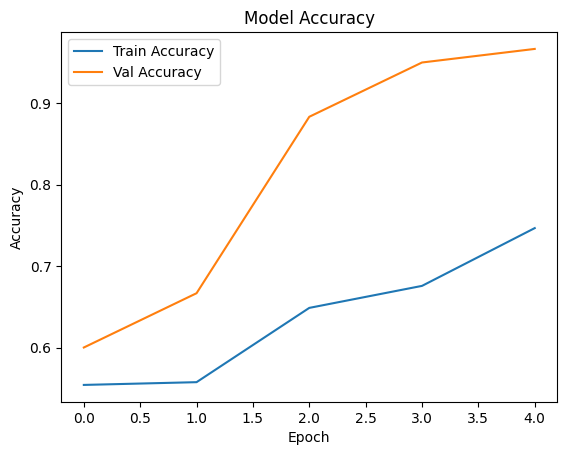

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

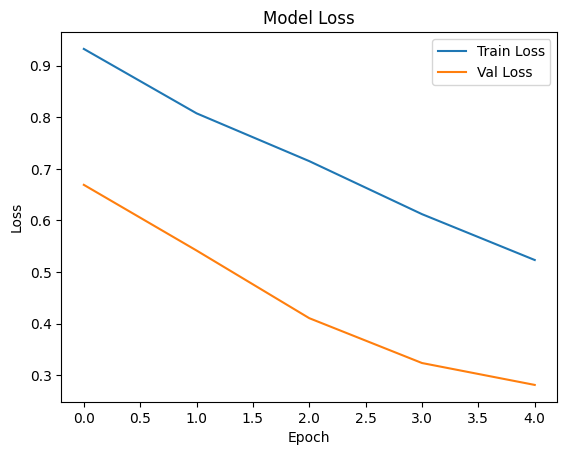

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model_densenet.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9674 - loss: 0.2755
Validation Accuracy: 96.67%


In [ ]:
#COMPARISON

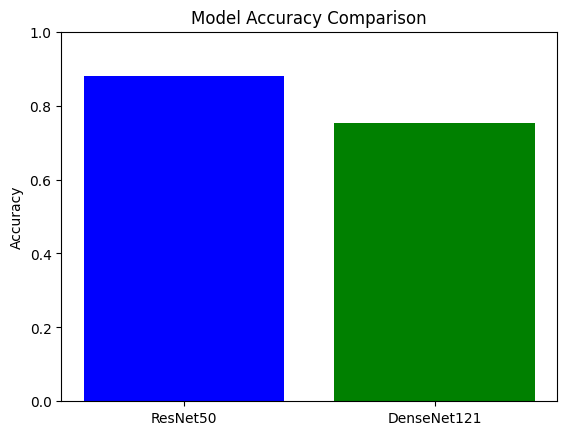

In [ ]:
import matplotlib.pyplot as plt

# Model names and their accuracies
models = ['ResNet50', 'DenseNet121']
accuracies = [0.8792, 0.7522]

# Plotting
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [ ]:
#GradCAm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
import cv2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

validation_datagen = ImageDataGenerator(rescale=1./255)

val_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/Covid19_chestXray/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 60 images belonging to 2 classes.


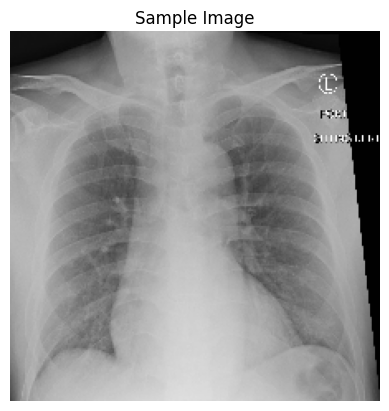

In [ ]:
img_batch, label_batch = val_generator[0]
img_input = img_batch[0]
plt.imshow(img_input)
plt.axis('off')
plt.title("Sample Image")
plt.show()


In [ ]:
#ENSEMBLE LEARNING

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/Covid19_chestXray/Val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 60 images belonging to 2 classes.


In [ ]:
resnet_preds = model_1.predict(val_generator)
densenet_preds = model_densenet.predict(val_generator)

# Combine predictions using soft voting (adjust weights if needed)
final_preds = (0.5 * resnet_preds) + (0.5 * densenet_preds)

# Convert to class labels (0 or 1)
final_classes = (final_preds > 0.5).astype(int)

# Get actual class labels
y_true = val_generator.classes


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 8s/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
print("Ensemble Accuracy:", accuracy_score(y_true, final_classes))
print("\nClassification Report:\n", classification_report(y_true, final_classes))


Ensemble Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.73      0.57        30
           1       0.38      0.17      0.23        30

    accuracy                           0.45        60
   macro avg       0.43      0.45      0.40        60
weighted avg       0.43      0.45      0.40        60



In [ ]:
import numpy as np
from collections import Counter

print("Class Distribution:", Counter(val_generator.classes))


Class Distribution: Counter({np.int32(0): 30, np.int32(1): 30})


In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_true, final_preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("🔧 Optimal Threshold:", optimal_threshold)

final_classes = (final_preds > optimal_threshold).astype(int)


🔧 Optimal Threshold: 0.54837155


In [ ]:
from sklearn.metrics import roc_curve

# Get ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, final_preds)

# Find the optimal threshold that maximizes TPR and minimizes FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("Optimal Threshold:", optimal_threshold)

# Use this threshold to classify your predictions
final_classes = (final_preds > optimal_threshold).astype(int)


Optimal Threshold: 0.54837155


In [ ]:
from sklearn.utils import class_weight

# Compute class weights based on the training data
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert to dictionary format
class_weights_dict = dict(enumerate(class_weights))

# Refit the model with class weights
model_1.fit(
    train_generator,
    epochs=5,
    class_weight=class_weights_dict,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 108s 9s/step - accuracy: 0.6057 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.7442
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 9s/step - accuracy: 0.7376 - loss: 0.5343 - val_accuracy: 0.5000 - val_loss: 0.7576
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 9s/step - accuracy: 0.8279 - loss: 0.4006 - val_accuracy: 0.5000 - val_loss: 0.7698
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 102s 10s/step - accuracy: 0.8664 - loss: 0.3340 - val_accuracy: 0.5000 - val_loss: 0.7814
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 98s 10s/step - accuracy: 0.9054 - loss: 0.2667 - val_accuracy: 0.5000 - val_loss: 0.7914


In [ ]:
# Fine-tune the top layers of ResNet
base_model.trainable = True
# Optionally, freeze lower layers and train only the top ones
for layer in base_model.layers[:-30]:  # Freezing the first few layers
    layer.trainable = False

# Recompile and retrain
model_1.compile(optimizer=Adam(learning_rate=1e-5),
                loss='binary_crossentropy',
                metrics=['accuracy'])

model_1.fit(train_generator, epochs=5, class_weight=class_weights_dict, validation_data=val_generator)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 129s 11s/step - accuracy: 0.8662 - loss: 0.2960 - val_accuracy: 0.5000 - val_loss: 0.8011
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 88s 9s/step - accuracy: 0.8976 - loss: 0.3397 - val_accuracy: 0.5000 - val_loss: 0.8300
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 97s 10s/step - accuracy: 0.9274 - loss: 0.2043 - val_accuracy: 0.5000 - val_loss: 0.8820
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 89s 9s/step - accuracy: 0.9383 - loss: 0.2216 - val_accuracy: 0.5000 - val_loss: 0.9469
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 98s 10s/step - accuracy: 0.9216 - loss: 0.2181 - val_accuracy: 0.5000 - val_loss: 1.0099


In [ ]:
# Unfreeze the top layers of DenseNet
base_model_densenet.trainable = True

# Optionally, freeze lower layers and train only the top ones
for layer in base_model_densenet.layers[:-30]:  # Freeze the first few layers, adjust as needed
    layer.trainable = False

# Recompile the DenseNet model with a lower learning rate for fine-tuning
model_densenet.compile(optimizer=Adam(learning_rate=1e-5),  # Smaller learning rate
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

# Train the model again with class weights
model_densenet.fit(
    train_generator,
    epochs=5,  # Adjust number of epochs as needed
    class_weight=class_weights_dict,  # Use class weights to handle imbalance
    validation_data=val_generator  # Include validation data
)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 99s 8s/step - accuracy: 0.5094 - loss: 0.8532 - val_accuracy: 0.3667 - val_loss: 0.7653
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 7s/step - accuracy: 0.5072 - loss: 0.8083 - val_accuracy: 0.4333 - val_loss: 0.7295
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.5181 - loss: 0.8375 - val_accuracy: 0.5500 - val_loss: 0.6984
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 77s 8s/step - accuracy: 0.5111 - loss: 0.9196 - val_accuracy: 0.5833 - val_loss: 0.6689
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.6185 - loss: 0.7449 - val_accuracy: 0.6167 - val_loss: 0.6420


In [ ]:
model_densenet.save('fine_tuned_densenet_model.h5')  # Save the model after fine-tuning


In [ ]:
# Evaluate DenseNet model on validation data
val_loss, val_accuracy = model_densenet.evaluate(val_generator)
print(f'DenseNet Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 5s/step - accuracy: 0.5569 - loss: 0.6790
DenseNet Validation Loss: 0.6420223116874695, Validation Accuracy: 0.6166666746139526


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on validation data
densenet_preds = model_densenet.predict(val_generator)
densenet_preds = (densenet_preds > 0.5).astype(int)  # Convert to binary predictions

# Get true labels (adjust this based on how you're getting true labels)
true_labels = val_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_labels, densenet_preds)
print("Confusion Matrix (DenseNet):")
print(cm)

# Print classification report (precision, recall, f1-score)
print(classification_report(true_labels, densenet_preds))


1/2 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 12s/step
Confusion Matrix (DenseNet):
[[13 17]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.59      0.80      0.68        30

    accuracy                           0.62        60
   macro avg       0.63      0.62      0.60        60
weighted avg       0.63      0.62      0.60        60



In [ ]:
# Predict with adjusted threshold
threshold = 0.45
densenet_preds = (densenet_preds > threshold).astype(int)

# Recalculate confusion matrix and classification report
cm = confusion_matrix(true_labels, densenet_preds)
print("Adjusted Confusion Matrix (DenseNet):")
print(cm)

print(classification_report(true_labels, densenet_preds))


Adjusted Confusion Matrix (DenseNet):
[[13 17]
 [ 6 24]]
              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.59      0.80      0.68        30

    accuracy                           0.62        60
   macro avg       0.63      0.62      0.60        60
weighted avg       0.63      0.62      0.60        60



In [ ]:
#COMBINING MODELS FROM BOTH MODELS(ENSEMBLE)
# Predict from both models (using validation data)
resnet_preds = model_1.predict(val_generator)
densenet_preds = model_densenet.predict(val_generator)

# Apply thresholds if necessary
resnet_preds = (resnet_preds > 0.45).astype(int)
densenet_preds = (densenet_preds > 0.45).astype(int)

# Combine predictions (weighted average)
final_preds = (0.6 * resnet_preds) + (0.4 * densenet_preds)  # Adjust weights as needed
final_preds = (final_preds > 0.5).astype(int)  # Final prediction based on weighted average

# Calculate confusion matrix and classification report for the ensemble
cm = confusion_matrix(true_labels, final_preds)
print("Final Confusion Matrix (Ensemble):")
print(cm)

print(classification_report(true_labels, final_preds))


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 6s/step
Final Confusion Matrix (Ensemble):
[[30  0]
 [30  0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model_1.save("resnet_model.h5")
model_densenet.save("densenet_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load models
model_1 = load_model("resnet_model.h5")
model_densenet = load_model("densenet_model.h5")

# Predict
resnet_preds = model_1.predict(val_generator)
densenet_preds = model_densenet.predict(val_generator)

# Weighted Average Ensemble
final_preds = (0.6 * resnet_preds) + (0.4 * densenet_preds)
final_preds = (final_preds > 0.5).astype(int)  # Apply threshold

# Evaluate
from sklearn.metrics import confusion_matrix, classification_report
true_labels = val_generator.classes
cm = confusion_matrix(true_labels, final_preds)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(true_labels, final_preds))


2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 8s/step
Confusion Matrix:
 [[30  0]
 [30  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# 🔹 Individual model predictions
resnet_final = (resnet_preds > 0.5).astype(int)
densenet_final = (densenet_preds > 0.5).astype(int)

# 🔹 Ensemble prediction (Weighted average + threshold 0.5)
ensemble_preds = ((0.6 * resnet_preds) + (0.4 * densenet_preds)) > 0.5
ensemble_final = ensemble_preds.astype(int)

# 🔹 True labels
true_labels = val_generator.classes

# 🔹 Confusion Matrices
print("ResNet50 Confusion Matrix:")
print(confusion_matrix(true_labels, resnet_final))

print("\nDenseNet121 Confusion Matrix:")
print(confusion_matrix(true_labels, densenet_final))

print("\nEnsemble Model Confusion Matrix:")
print(confusion_matrix(true_labels, ensemble_final))

# Optional: Classification Reports
print("\nEnsemble Classification Report:")
print(classification_report(true_labels, ensemble_final))


🔵 ResNet50 Confusion Matrix:
[[30  0]
 [30  0]]

🟢 DenseNet121 Confusion Matrix:
[[13 17]
 [ 6 24]]

🟣 Ensemble Model Confusion Matrix:
[[30  0]
 [30  0]]

🧾 Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        30
           1       0.00      0.00      0.00        30

    accuracy                           0.50        60
   macro avg       0.25      0.50      0.33        60
weighted avg       0.25      0.50      0.33        60



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
ensemble_preds = ((0.4 * resnet_preds) + (0.6 * densenet_preds)) > 0.5
ensemble_final = ensemble_preds.astype(int)

print(confusion_matrix(true_labels, ensemble_final))
print(classification_report(true_labels, ensemble_final))


[[29  1]
 [26  4]]
              precision    recall  f1-score   support

           0       0.53      0.97      0.68        30
           1       0.80      0.13      0.23        30

    accuracy                           0.55        60
   macro avg       0.66      0.55      0.46        60
weighted avg       0.66      0.55      0.46        60



In [ ]:
ensemble_preds = ((0.2 * resnet_preds) + (0.8 * densenet_preds)) > 0.5


In [ ]:
import numpy as np

# Final predictions
final_preds = ((0.2 * resnet_preds) + (0.8 * densenet_preds)) > 0.5
final_preds = final_preds.astype(int)

# Save predictions and true labels to CSV for report
import pandas as pd

results_df = pd.DataFrame({
    'True Label': true_labels,
    'Predicted Label': final_preds.flatten()
})

results_df.to_csv('final_ensemble_predictions.csv', index=False)


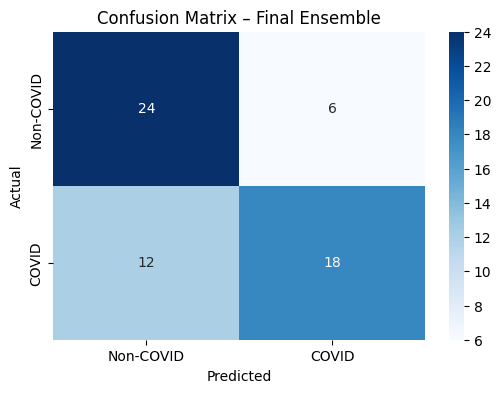

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, final_preds)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-COVID', 'COVID'], yticklabels=['Non-COVID', 'COVID'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Final Ensemble')
plt.savefig('ensemble_confusion_matrix.png')
plt.show()


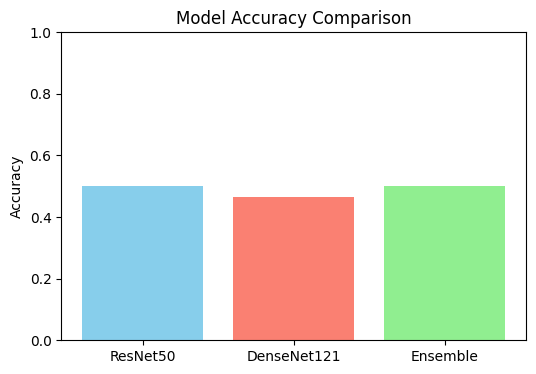

In [ ]:
# Get individual model accuracies
resnet_classes = (resnet_preds > 0.5).astype(int)
densenet_classes = (densenet_preds > 0.5).astype(int)

acc_resnet = accuracy_score(y_true, resnet_classes)
acc_densenet = accuracy_score(y_true, densenet_classes)
acc_ensemble = accuracy_score(y_true, final_classes)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(['ResNet50', 'DenseNet121', 'Ensemble'], [acc_resnet, acc_densenet, acc_ensemble], color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
